## Importing Libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data - 10 features and 1000 entries

In [45]:
ad_data=pd.read_csv("D:/Pandas/advertising_data.csv ")
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,1
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,1


In [46]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 62.6+ KB


In [47]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.559000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.496755
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.000000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.000000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,1.000000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.000000


## Data Exploration

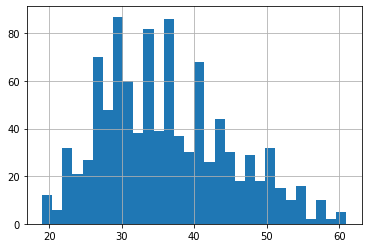

In [48]:
ad_data['Age'].hist(bins=30)

### Jointplot used to analyze the relationship between two variables and describe their individual distributions on the same plot.

### Creating a jointplot showing Area Income versus Age.

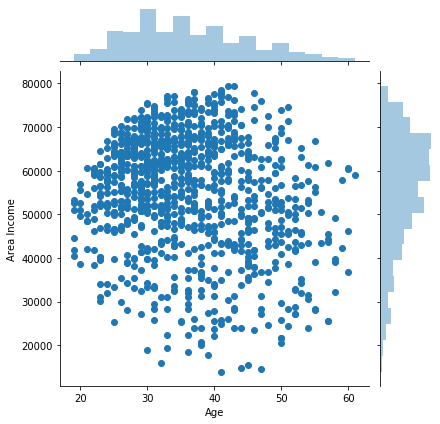

In [49]:
sns.jointplot(x='Age', y='Area Income', data=ad_data, kind='scatter')

### Creating a jointplot showing the kde distributions of Daily Time spent on site vs. Age.

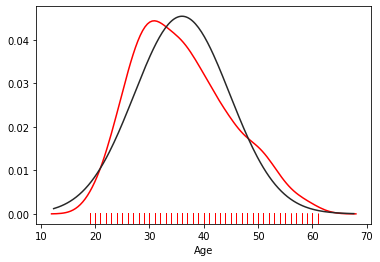

In [63]:
from scipy.stats import norm
sns.distplot(ad_data['Age'], hist=False, color='r', rug=True, fit=norm);

#### We can conclude that younger users spend more time on the site. This implies that users of the age between 20 and 40 years can be the main target group for the marketing campaign.

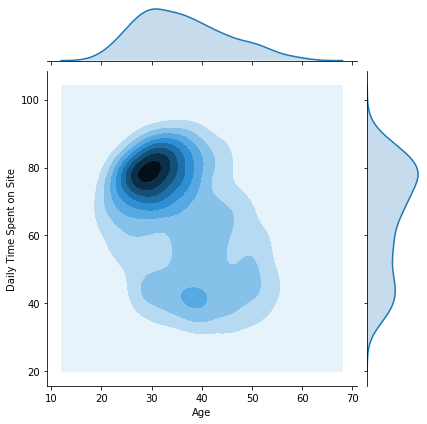

In [50]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=ad_data, kind='kde')

### Creating a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'

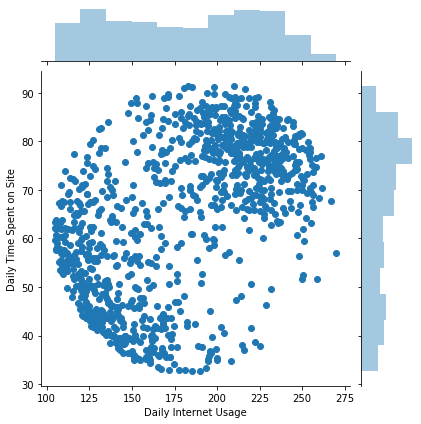

In [51]:
sns.jointplot(x='Daily Internet Usage', y='Daily Time Spent on Site', data=ad_data, kind='scatter')

### Creating a pairplot with the hue defined by the 'Clicked on Ad' column feature.

D:\Users\sivaji\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Users\sivaji\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


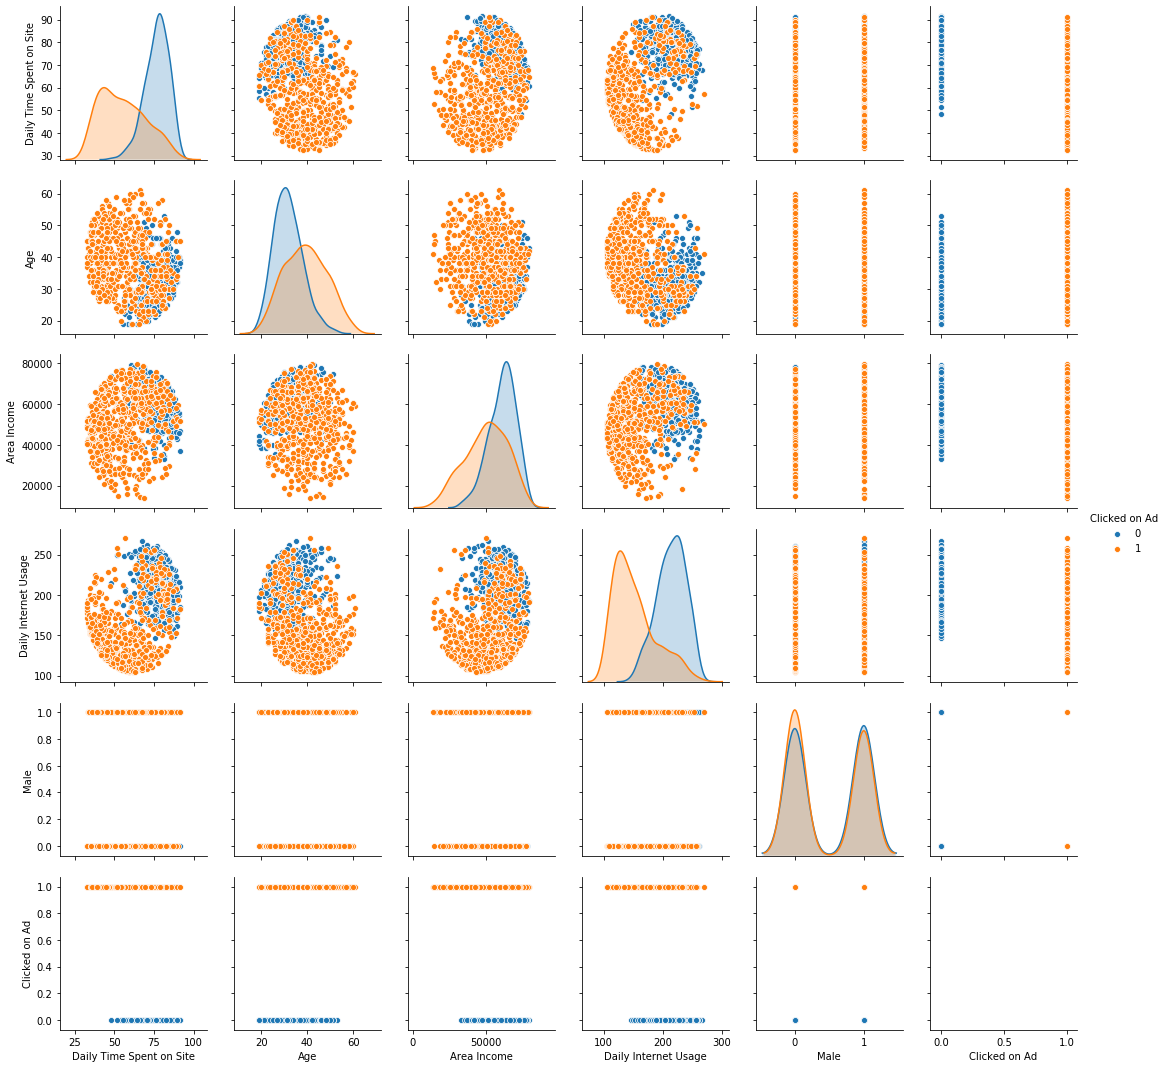

In [52]:
sns.pairplot(ad_data, hue='Clicked on Ad')

### Spliting the data into training set and testing set 

In [53]:
import sklearn
from sklearn.model_selection import train_test_split

In [54]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [55]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Training and fitting a logistic regression model on the training set.

### Regression uses a logistic function to model binary dependent variables

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
model=LogisticRegression()
model.fit(X_train,y_train)

D:\Users\sivaji\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Predicting values for the testing data.

In [59]:
predictions=model.predict(X_test)
print(predictions)
print("More",len(predictions), "Predictions are estimated")

[1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0
 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0
 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1
 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0
 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1
 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1
 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1
 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0]
More 330 Predictions are estimated


In [64]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [65]:
model_1 = LogisticRegression(solver='lbfgs')
model_1.fit(X_train, y_train)
predictions_LR = model_1.predict(X_test)

print('Logistic regression accuracy:', accuracy_score(predictions, y_test))
print('')
print('Confusion matrix:')
print(confusion_matrix(y_test,predictions_LR))

Logistic regression accuracy: 0.8787878787878788

Confusion matrix:
[[137  12]
 [ 32 149]]


### The confusion matrix shows us that the 286 predictions have been done correctly and that there are only 44 incorrect predictions. 

## Creating a classification report for the model.

In [60]:
from sklearn.metrics import classification_report

In [61]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       149
           1       0.93      0.85      0.88       181

    accuracy                           0.88       330
   macro avg       0.88      0.88      0.88       330
weighted avg       0.88      0.88      0.88       330

